In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

In [66]:
df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [68]:
category_features = list(df.select_dtypes(include="object").columns)

In [69]:
for col in category_features:
    df[col] = df[col].astype("category")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  cat

# EDA

Duplicate

In [71]:
df.nunique()

,0
id,27901
Gender,2
Age,34
City,52
Profession,14
Academic Pressure,6
Work Pressure,3
CGPA,332
Study Satisfaction,6
Job Satisfaction,5


In [72]:
df.duplicated().sum()

np.int64(0)

Пропуски

In [73]:
df.isnull().sum().sum()

np.int64(0)

Типы данных

In [74]:
categorial_features  = list(df.select_dtypes(include=['object']).columns)

print(categorial_features)

[]


In [75]:
df[categorial_features]

""
0
1
2
3
4
...
27896
27897
27898
27899


In [76]:
for i in categorial_features:
    print(f"Unique for {i}: {df[i].unique()}\n")

In [77]:
outlier_arr = [i for i in df["City"].unique() if (df['City'] == i).sum() < 5]

for i in df["City"].unique():
    print(f"{i} - {(df['City'] == i).sum()}")

Visakhapatnam - 969
Bangalore - 767
Srinagar - 1372
Varanasi - 685
Jaipur - 1036
Pune - 968
Thane - 1139
Chennai - 885
Nagpur - 651
Nashik - 547
Vadodara - 694
Kalyan - 1570
Rajkot - 816
Ahmedabad - 951
Kolkata - 1066
Mumbai - 699
Lucknow - 1155
Indore - 643
Surat - 1078
Ludhiana - 1111
Bhopal - 934
Meerut - 825
Agra - 1094
Ghaziabad - 745
Hyderabad - 1340
Vasai-Virar - 1290
Kanpur - 609
Patna - 1007
Faridabad - 461
Delhi - 768
Saanvi - 2
M.Tech - 1
Bhavna - 2
'Less Delhi' - 1
City - 2
3.0 - 1
'Less than 5 Kalyan' - 1
Mira - 1
Harsha - 2
Vaanya - 1
Gaurav - 1
Harsh - 1
Reyansh - 1
Kibara - 1
Rashi - 1
ME - 1
M.Com - 1
Nalyan - 1
Mihir - 1
Nalini - 1
Nandini - 1
Khaziabad - 1


In [78]:
outlier_arr

['Saanvi',
 'M.Tech',
 'Bhavna',
 "'Less Delhi'",
 'City',
 '3.0',
 "'Less than 5 Kalyan'",
 'Mira',
 'Harsha',
 'Vaanya',
 'Gaurav',
 'Harsh',
 'Reyansh',
 'Kibara',
 'Rashi',
 'ME',
 'M.Com',
 'Nalyan',
 'Mihir',
 'Nalini',
 'Nandini',
 'Khaziabad']

In [79]:
for i in df["Degree"].unique():
    print(f"{i} - {(df['Degree'] == i).sum()}")

B.Pharm - 810
BSc - 888
BA - 600
BCA - 1433
M.Tech - 1022
PhD - 522
'Class 12' - 6080
B.Ed - 1867
LLB - 671
BE - 613
M.Ed - 821
MSc - 1190
BHM - 925
M.Pharm - 582
MCA - 1044
MA - 544
B.Com - 1506
MD - 572
MBA - 562
MBBS - 696
M.Com - 734
B.Arch - 1478
LLM - 482
B.Tech - 1152
BBA - 696
ME - 185
MHM - 191
Others - 35


In [80]:
df = df[~df["City"].isin(outlier_arr)]

In [81]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [82]:
print((df['Financial Stress'] == '?').sum())

3


In [83]:
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

df = df.dropna(subset=['Financial Stress'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27872 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27872 non-null  int64   
 1   Gender                                 27872 non-null  category
 2   Age                                    27872 non-null  float64 
 3   City                                   27872 non-null  category
 4   Profession                             27872 non-null  category
 5   Academic Pressure                      27872 non-null  float64 
 6   Work Pressure                          27872 non-null  float64 
 7   CGPA                                   27872 non-null  float64 
 8   Study Satisfaction                     27872 non-null  float64 
 9   Job Satisfaction                       27872 non-null  float64 
 10  Sleep Duration                         27872 non-null  category

In [85]:
categorial_features  = list(df.select_dtypes(include=['category']).columns)
numeric_features = list(df.select_dtypes(include=['float', 'int']).columns)

In [86]:
binary_cols = [i for i in categorial_features if df[i].nunique() == 2]
caterigal_cols = [i for i in categorial_features if df[i].nunique() > 2]

In [ ]:
le = LabelEncoder()
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

In [88]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[caterigal_cols])

In [89]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Chennai,City_Delhi,City_Faridabad,City_Ghaziabad,City_Hyderabad,City_Indore,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27869,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
df = df.drop(caterigal_cols, axis=1)
df = pd.concat([df.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [91]:
df

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27867,140685,0,27.0,5.0,0.0,5.75,5.0,0.0,1,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27868,140686,1,27.0,2.0,0.0,9.40,3.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27869,140689,1,31.0,3.0,0.0,6.61,4.0,0.0,0,12.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27870,140690,0,18.0,5.0,0.0,6.88,2.0,0.0,1,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df.isnull().sum().sum()

np.int64(0)

In [93]:
df.isnull().values.any()

np.False_

In [94]:
scaler = StandardScaler()
df[numeric_features[1:-1]] = scaler.fit_transform(df[numeric_features[1:-1]])

In [95]:
df

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,1.463117,1.345121,-0.009782,0.893375,-0.693958,-0.015348,1,-1.121211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0,-0.371359,-0.826352,-0.009782,-1.193784,1.510343,-0.015348,0,-1.121211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,1.055455,-0.102528,-0.009782,-0.425546,1.510343,-0.015348,0,0.497114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,0.443963,-0.102528,-0.009782,-1.404540,-0.693958,-0.015348,1,-0.851491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,-0.167528,0.621297,-0.009782,0.322296,0.040809,-0.015348,1,-1.660653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27867,140685,0,0.240133,1.345121,-0.009782,-1.295763,1.510343,-0.015348,1,-0.042328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27868,140686,1,0.240133,-0.826352,-0.009782,1.185714,0.040809,-0.015348,0,-1.930374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27869,140689,1,1.055455,-0.102528,-0.009782,-0.711086,0.775576,-0.015348,0,1.306277,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27870,140690,0,-1.594343,1.345121,-0.009782,-0.527525,-0.693958,-0.015348,1,0.766835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# KMeans

K-Means — это алгоритм кластеризации, который разделяет данные на заданное количество групп(K). Он работает в три этапа: сначала случайно выбираются центры кластеров, затем точки распределяются по ближайшим центрам, после чего центры пересчитываются. Процесс повторяется, пока центры не перестанут смещаться. Алгоритм лучше всего работает, когда группы данных имеют округлую форму. Для подбора оптимального числа кластеров используется "метод локтя" — он помогает найти значение K, при котором добавление новых групп уже не дает существенного улучшения.

In [109]:
df_not_processed_km = df.copy()

In [97]:
inertias = []
silhouettes = []

In [98]:
K = range(2, 16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df, kmeans.labels_))

/tmp/ipython-input-1066383748.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, inertias, 'bo-', color='purple')
/tmp/ipython-input-1066383748.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(K, silhouettes, 'go-', color='orange')


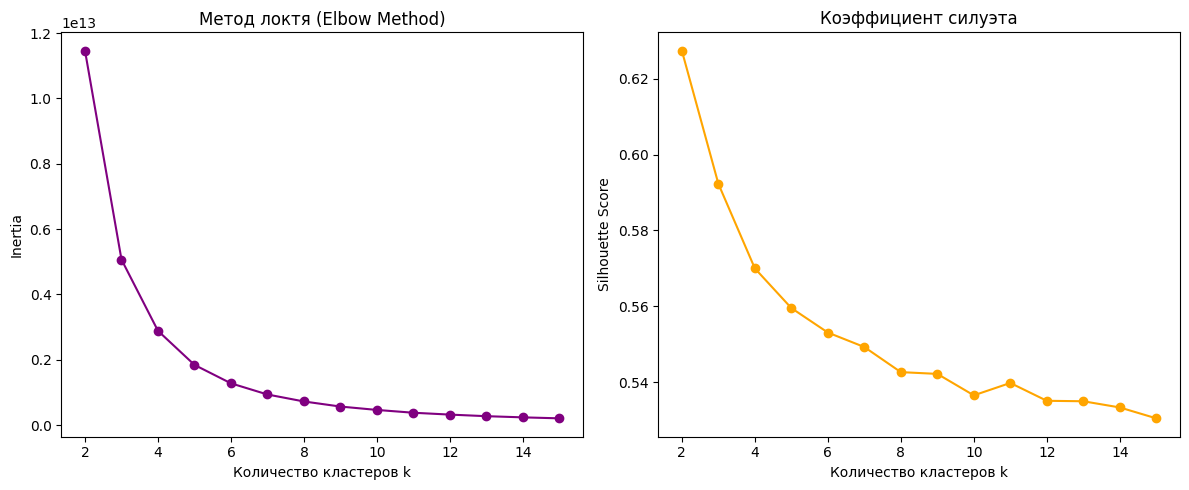

In [103]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-', color='purple')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-', color='orange')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()


Анализ метода локтя и коэффициента силуэта показал, что оптимальное количество кластеров составляет 2. При таком разделении достигается наилучшее качество группировки с коэффициентом силуэта ~0.625.

Silhouette Score: 0.592
Calinski–Harabasz Index: 112698.7
Davies–Bouldin Index: 0.498


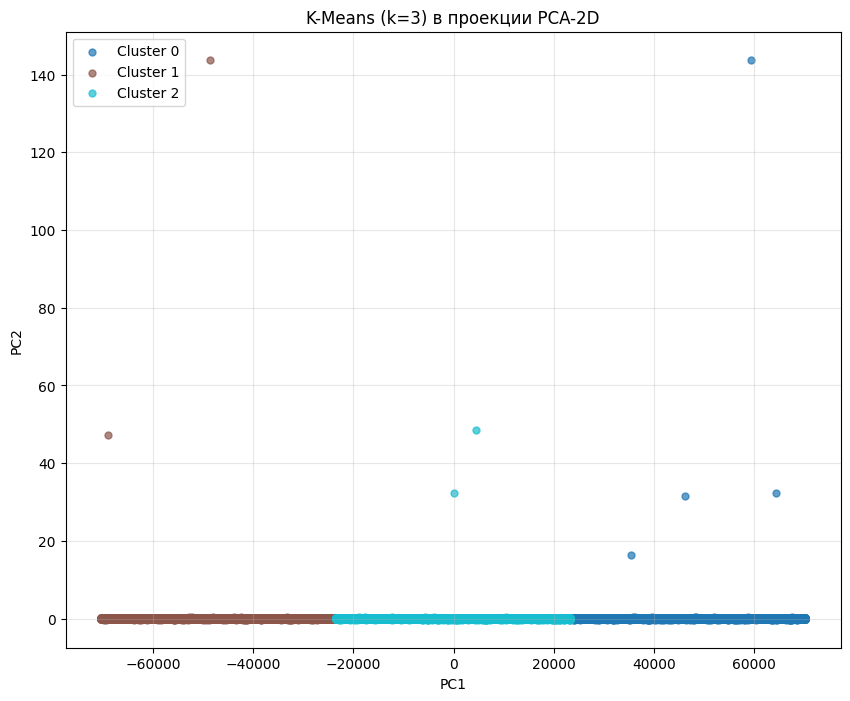


Распределение по кластерам:
Cluster 0: 9377 объектов (33.6%)
Cluster 1: 9293 объектов (33.3%)
Cluster 2: 9202 объектов (33.0%)


In [114]:
k_base = 3
km = KMeans(n_clusters=k_base, n_init=10, random_state=42)
labels_km = km.fit_predict(df_not_processed_km)
df_not_processed_km['cluster_kmeans_base'] = labels_km
sil = silhouette_score(df_not_processed_km, labels_km)
ch  = calinski_harabasz_score(df_not_processed_km, labels_km)
db  = davies_bouldin_score(df_not_processed_km, labels_km)

print(f"Silhouette Score: {sil:.3f}")
print(f"Calinski–Harabasz Index: {ch:.1f}")
print(f"Davies–Bouldin Index: {db:.3f}")

pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(df_not_processed_km)

colors = plt.cm.tab10(np.linspace(0, 1, k_base))

plt.figure(figsize=(10, 8))
for i, lab in enumerate(np.unique(labels_km)):
    mask = labels_km == lab
    plt.scatter(X2[mask, 0], X2[mask, 1], s=25, color=colors[i], label=f'Cluster {lab}', alpha=0.7)

plt.title(f'K-Means (k={k_base}) в проекции PCA-2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nРаспределение по кластерам:")
cluster_counts = pd.Series(labels_km).value_counts().sort_index()
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} объектов ({count/len(labels_km)*100:.1f}%)")

Анализ результатов кластеризации методом K-Means с количеством кластеров k=3 в проекции на две главные компоненты (PCA-2D) демонстрирует четкое разделение данных на три компактные группы. Визуализация показывает, что кластеры хорошо отделены друг от друга с минимальными областями перекрытия, что свидетельствует об эффективном выделении различных категорий студентов.

In [43]:
kmeans_best = KMeans(n_clusters=4, random_state=42)
kmeans_best.fit(df)

df_not_processed_km['cluster'] = kmeans_best.labels_
cluster_means_km = df_not_processed_km.groupby('cluster').mean()
cluster_means_km

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
cluster,,,,,,,,,,,,,,,,,,,,,
0,52726.763978,0.560280,0.006090,-0.015370,-0.009782,-0.008128,0.000476,-0.015348,0.622161,-0.004312,...,0.019656,0.019802,0.024024,0.037566,0.021549,0.006261,0.007426,0.041788,0.001747,0.019656
1,122795.119340,0.556214,0.014479,0.008154,0.006243,-0.018547,0.005361,0.013236,0.632529,-0.004090,...,0.018479,0.019608,0.026097,0.039075,0.019185,0.006348,0.006630,0.042460,0.000987,0.018903
2,17622.405807,0.562294,-0.005858,0.001216,0.006468,0.020089,-0.011847,0.007195,0.634244,0.008329,...,0.021027,0.020312,0.024174,0.036905,0.019883,0.006866,0.006723,0.042197,0.001430,0.017737
3,87725.467649,0.550260,-0.014950,0.005669,-0.003219,0.006768,0.006002,-0.005593,0.642548,0.000055,...,0.018920,0.020797,0.025274,0.036251,0.021375,0.007077,0.006644,0.044050,0.000867,0.018631


In [44]:
cluster_means_km = df_not_processed_km.groupby('cluster').mean()
cluster_means_km[["Age", "Gender", "Depression"]]

,Age,Gender,Depression
cluster,,,
0,0.006090,0.560280,0.580082
1,0.014479,0.556214,0.587671
2,-0.005858,0.562294,0.587613
3,-0.014950,0.550260,0.586655


# DBSCAN

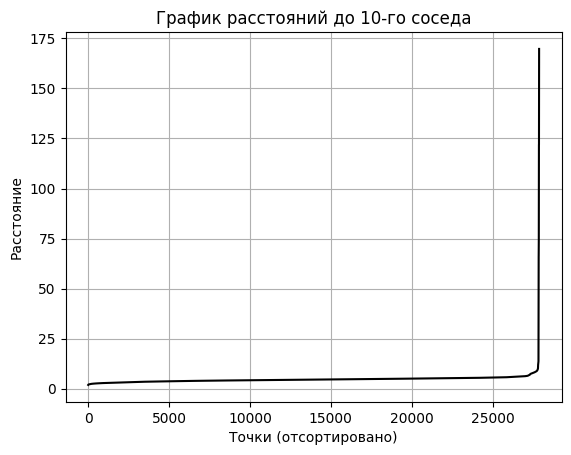

In [45]:
k_distance = 10
nn_k = NearestNeighbors(n_neighbors=k_distance)
nn_k.fit(df_processed)
distances_k, indices_k = nn_k.kneighbors(df_processed)
distances_k = np.sort(distances_k[:, k_distance-1])
plt.plot(distances_k, color='black')
plt.title(f'График расстояний до {k_distance}-го соседа')
plt.xlabel('Точки (отсортировано)')
plt.ylabel('Расстояние')
plt.grid(True)
plt.show()

Анализ графика расстояний до k-го ближайшего соседа демонстрирует характерное распределение, типичное для данных со сложной структурой. На графике наблюдается плавный рост расстояний с несколькими выраженными перегибами, что свидетельствует о неоднородной плотности распределения объектов в пространстве признаков.

In [48]:
dbscan = DBSCAN(eps=17, min_samples=10)
clusters_dbs = dbscan.fit_predict(df)

In [55]:
df_not_processed_dbs = df.copy()
df_not_processed_dbs['cluster'] = clusters_dbs

In [51]:
mask = clusters_dbs != -1

In [56]:
sil_dbs = silhouette_score(df_not_processed_dbs[mask], clusters_dbs[mask])
db_index_dbs = davies_bouldin_score(df_not_processed_dbs[mask], clusters_dbs[mask])
ch_index_dbs = calinski_harabasz_score(df_not_processed_dbs[mask], clusters_dbs[mask])

print(f"Silhoutte score - {round(sil_dbs, 3)}\nDBI - {round(db_index_dbs, 3)}\nCHI - {round(ch_index_dbs, 3)}")

Silhoutte score - 0.773
DBI - 0.28
CHI - 94105652.984


In [57]:
cluster_mean_dbs = df_not_processed_dbs.groupby('cluster').mean()
cluster_mean_dbs

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
cluster,,,,,,,,,,,,,,,,,,,,,
-1,70710.822407,0.563510,-0.000732,0.003648,0.006177,-0.007268,0.005240,0.009691,0.631000,-0.008131,...,0.018907,0.021365,0.023941,0.036525,0.019902,0.006849,0.007258,0.043901,0.001288,0.020721
0,331.571429,0.500000,-0.487834,0.362788,-0.009782,0.057152,-0.536508,-0.015348,0.714286,0.131064,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000
1,529.466667,0.666667,0.158601,-0.006018,-0.009782,0.189497,-0.449036,-0.015348,0.533333,0.263356,...,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000
2,601.769231,0.615385,0.067661,0.064508,-0.009782,-0.013972,-0.241794,-0.015348,0.846154,0.476366,...,0.000000,0.076923,0.000000,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000
3,720.813953,0.627907,0.026822,-0.018362,-0.009782,-0.124986,0.023721,-0.015348,0.627907,0.189758,...,0.023256,0.000000,0.000000,0.023256,0.069767,0.000000,0.000000,0.023256,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,139807.800000,0.500000,-0.432508,0.331767,-0.009782,0.244112,0.555146,-0.015348,0.400000,0.038589,...,0.000000,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
757,139988.153846,0.461538,0.240133,-0.102528,-0.009782,-0.520726,0.323411,-0.015348,0.692308,0.580105,...,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923
758,140162.545455,0.272727,-0.352829,-0.102528,-0.009782,-0.528761,-0.025988,-0.015348,0.818182,-0.140408,...,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
